18130122 Cielo Luz Elena Llamas Servin

18130141 Cristyaquelin Dominguez Felix

18130159 Yañez Gonzalez Christian Emmanuel

Suponer un cañón situado en el origen de un sistema de coordenadas cartesiano. 

Se tiene 1 archivo de entrada inCanion.csv, el cual tiene la siguiente información: 

́anguloInicial velocidadInicial

Se deberán realizar los cálculos necesarios y escribir los resultados en el archivo outCanion.csv, con el siguiente formato:

alturaMáxima tiempoVuelo alcanceHorizontal

NOTA: Recuerda que (πradianes=180), (g≈9.8)

In [163]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import math

datos = pd.read_csv("./data/inCanion.csv")
datos = datos.to_numpy()
g = 9.8

temp = [[d for d in datos[0]]]
temp[0].append(g)

print("inCanion.csv")
print(tabulate(temp, headers="anguloInicial,velocidadInicial,g".split(",")))

ang = datos[0][0]
vo = datos[0][1]

rad = math.radians(ang)
rad2 = math.radians(ang*2)
sin = math.sin(rad)
sin2 = math.sin(rad2)

altura = (math.pow(vo, 2) * math.pow(sin, 2)) / (2 * g)
alcance = (math.pow(vo, 2) * sin2) / g
tiempo = ((vo * sin) / g) * 2

columns = ['alturaMáxima', 'tiempoVuelo', 'alcanceHorizontal']
data = ["{:.2f}".format(altura), "{:.2f}".format(tiempo), "{:.2f}".format(alcance)]

out = pd.DataFrame([data], columns=columns)
out.to_csv('./data/outCanion.csv', index=False)

out = pd.read_csv("./data/outCanion.csv")
out = out.to_numpy()
print("outCanion.csv")
print(tabulate(out, headers=columns))


inCanion.csv
  anguloInicial    velocidadInicial    g
---------------  ------------------  ---
             37                  20  9.8
outCanion.csv
  alturaMáxima    tiempoVuelo    alcanceHorizontal
--------------  -------------  -------------------
          7.39           2.46                39.24


Del ejemplo anterior, deberán dibujar una gráfica, donde se muestre la trayectoria del proyectil, recordando que el proyectil no penetra el suelo, que la altura inicial del cañón es 0 (H=0)

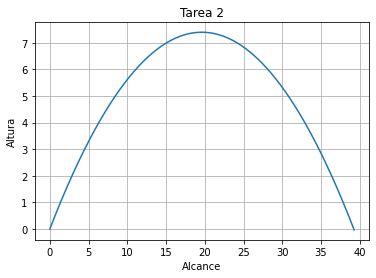

In [171]:
import matplotlib.pyplot as plt
import math
import pandas as pd

data_in = pd.read_csv("./data/inCanion.csv")
data_in = data_in.to_numpy()

g = 9.8
ang = datos[0][0]
vo = datos[0][1]

out = pd.read_csv("./data/outCanion.csv")
out = out.to_numpy()

rad = math.radians(ang)
sin = math.sin(rad)
cos = math.cos(rad)

x = []
y = []

h = 0
vx = vo * cos
vy = vo * sin
tiempo = out[0][1]

for t in np.arange(0, tiempo, .001):
    x.append(vx * t)
    y.append(h + vy * t - 1/2 * g * math.pow(t, 2))

plt.title("Tarea 2")
plt.plot(x, y)
plt.xlabel("Alcance")
plt.ylabel("Altura")
plt.grid()
plt.show()
